In [4]:
import os
import pandas as pd

incomplete_graphs, complete_graphs = [], []
for i in range(5):

    mixed_df = pd.read_csv(os.path.join(
        "data", "incomplete", f"graphs_rta_{i+1}.csv"))
    organized_df = pd.read_csv(os.path.join(
        "data", "complete", f"graphs_rta_{i+1}.csv"))
    
    incomplete_graphs.append(mixed_df)
    complete_graphs.append(organized_df)

incomplete_graphs = pd.concat(incomplete_graphs)
complete_graphs = pd.concat(complete_graphs)

incomplete_graphs_grouped = incomplete_graphs.groupby('V').agg({
    'ar_time_taken': 'mean',
    'mh_time_taken': 'mean'
}).reset_index()

complete_graphs_grouped = complete_graphs.groupby('V').agg({
    'ar_time_taken': 'mean',
    'mh_time_taken': 'mean'
}).reset_index()

In [5]:
incomplete_graphs_grouped.head()

,V,ar_time_taken,mh_time_taken
0,10,0.000008,0.000007
1,20,0.000011,0.000057
2,30,0.000018,0.000022
3,40,0.000028,0.000035
4,50,0.000039,0.000095


In [6]:
incomplete_graphs_grouped[incomplete_graphs_grouped["V"] >= 100].head()

,V,ar_time_taken,mh_time_taken
9,100,0.000110,0.000182
10,200,0.000357,0.000414
11,300,0.000743,0.000744
12,400,0.001278,0.001271
13,500,0.002005,0.001866


In [7]:
complete_graphs_grouped.head()

,V,ar_time_taken,mh_time_taken
0,10,0.000007,0.000006
1,20,0.000008,0.000009
2,30,0.000012,0.000015
3,40,0.000016,0.000021
4,50,0.000021,0.000029


In [8]:
complete_graphs_grouped[complete_graphs_grouped["V"] >= 100].head()


,V,ar_time_taken,mh_time_taken
9,100,0.000070,0.000079
10,200,0.000263,0.000246
11,300,0.000573,0.000539
12,400,0.001027,0.000851
13,500,0.001595,0.001289


In [14]:
import matplotlib.pyplot as plt


def vis_runtime_for_single_approach(complete, incomplete, approach_col, title):

    plt.figure(figsize=(10, 6))

    plt.plot(complete['V'], complete[approach_col],
             label='Complete Graphs', marker='o')
    plt.plot(incomplete['V'], incomplete[approach_col],
             label='Incomplete Graphs', marker='o')
    
    plt.xlabel('V')
    plt.ylabel('Time Taken')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


def vis_runtime_for_two_approaches(df, title):

    plt.figure(figsize=(10, 6))
    
    plt.plot(df['V'], df['ar_time_taken'],
             label='Array', marker='o')
    plt.plot(df['V'], df['mh_time_taken'],
             label='Min Heap', marker='o')
    
    plt.xlabel('V')
    plt.ylabel('Time Taken')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


### Part (a)

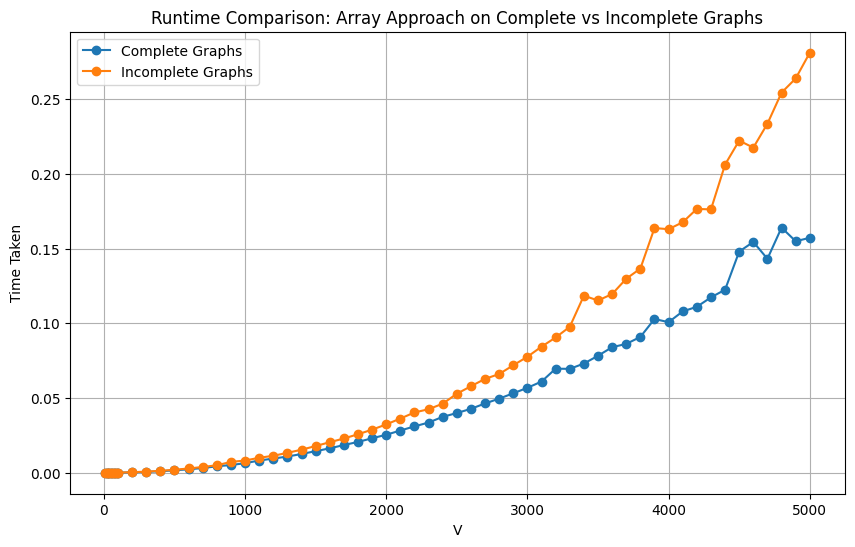

In [17]:
vis_runtime_for_single_approach(
    complete=complete_graphs_grouped,
    incomplete=incomplete_graphs_grouped,
    approach_col='ar_time_taken',
    title="Runtime Comparison: Array Approach on Complete vs Incomplete Graphs")


### Part (b)

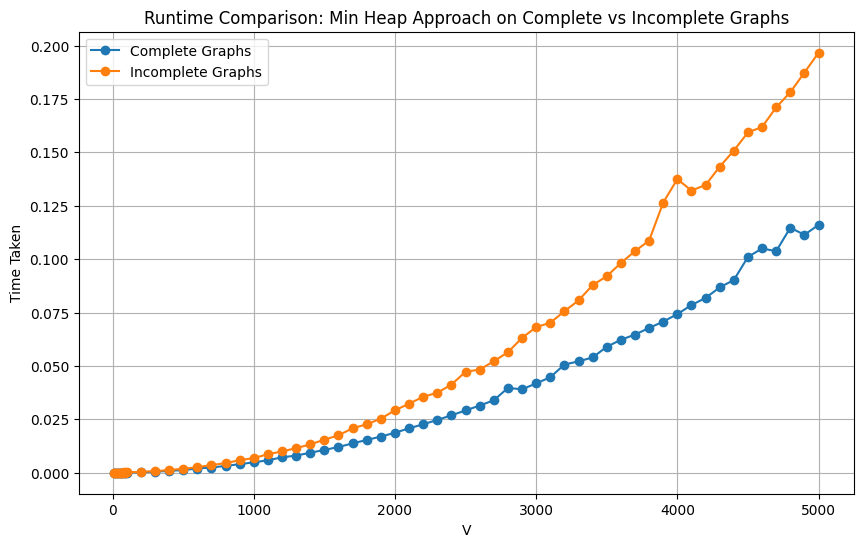

In [18]:
vis_runtime_for_single_approach(
    complete=complete_graphs_grouped,
    incomplete=incomplete_graphs_grouped,
    approach_col='mh_time_taken',
    title="Runtime Comparison: Min Heap Approach on Complete vs Incomplete Graphs")

In [19]:
min_zone = incomplete_graphs_grouped[incomplete_graphs_grouped["V"] <= 100]
max_zone = incomplete_graphs_grouped[incomplete_graphs_grouped["V"] >= 4000]

### Part (c)

Using an Array results in lower runtime, when graph size is small.

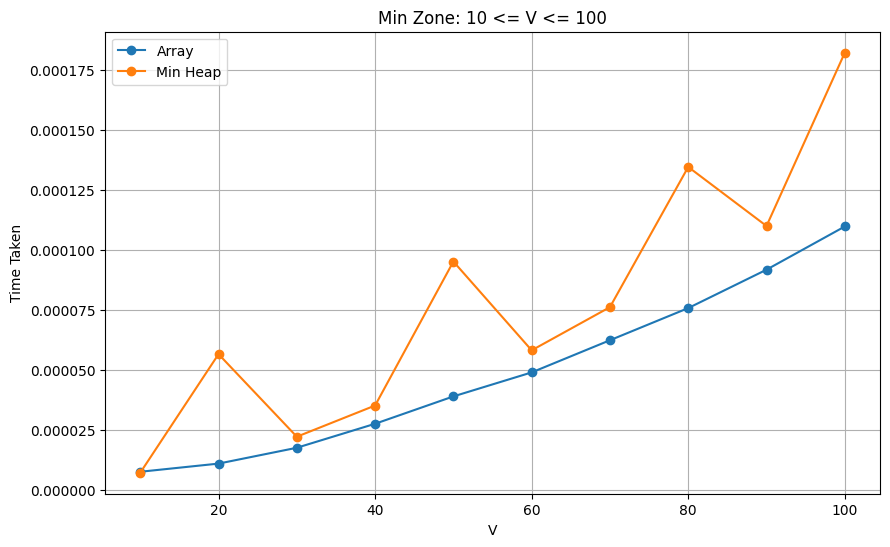

In [20]:
vis_runtime_for_two_approaches(
    df=min_zone,
    title="Min Zone: 10 <= V <= 100")

The gap proportionately increases as graph size V increases, eventually using a minimizing heap results in a lower runtime.

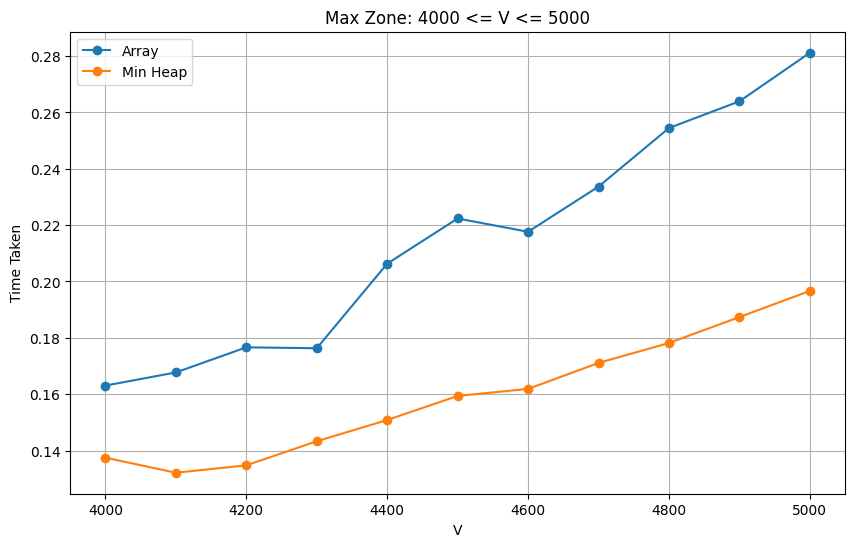

In [21]:
vis_runtime_for_two_approaches(
    df=max_zone,
    title="Max Zone: 4000 <= V <= 5000")